1. The data were collected from [Lending Club](https://www.lendingclub.com/) between 2007 and 2017. The dataset was downloaded from [Kaggle](https://www.kaggle.com/wordsforthewise/lending-club).

**1. imports**

In [1]:
#import required packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
# scipi is a library for statistical tests and visualizations 
from scipy import stats
# random enables us to generate random numbers
import random

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

#set globally printing options
pd.set_option('display.max_colwidth', 1000, 'display.max_columns', None, 'display.max_rows', None)

#import os

**2. Load the cleaned data**

In [2]:
#merge = pd.read_csv(r'C:\\Users\dongw\OneDrive\Documents\2. Programming\Springboard\DS\Lending Club Loan\data\df_merge_cleaned.csv')
df = pd.read_csv(r'C:\\Users\dongw\OneDrive\Documents\2. Programming\Springboard\DS\Lending Club Loan\data\df_acce_cleaned.csv')

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,total_rec_prncp,total_rec_int,application_type,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,3600.0,36,13.99,123.03,C,C4,10,MORTGAGE,55000.0,2015-12-01,Fully Paid,debt_consolidation,PA,5.91,0.0,675.0,679.0,1.0,30.0,7.0,2765.0,29.7,13.0,3600.0,821.72,Individual,144904.0,9300.0,4.0,20701.0,1506.0,37.2,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,3.0,76.9,0.0,178050.0,7746.0,2400.0,13734.0
1,24700.0,36,11.99,820.28,C,C1,10,MORTGAGE,65000.0,2015-12-01,Fully Paid,small_business,SD,16.06,1.0,715.0,719.0,4.0,6.0,22.0,21470.0,19.2,38.0,24700.0,979.66,Individual,204396.0,111800.0,4.0,9733.0,57830.0,27.1,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,2.0,97.4,7.7,314017.0,39475.0,79300.0,24667.0
2,20000.0,60,10.78,432.66,B,B4,10,MORTGAGE,63000.0,2015-12-01,Fully Paid,home_improvement,IL,10.78,0.0,695.0,699.0,0.0,NaN,6.0,7869.0,56.2,18.0,20000.0,2705.92,Joint App,189699.0,14000.0,6.0,31617.0,2737.0,55.9,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,100.0,50.0,218418.0,18696.0,6200.0,14877.0
3,10400.0,60,22.45,289.91,F,F1,3,MORTGAGE,104433.0,2015-12-01,Fully Paid,major_purchase,PA,25.37,1.0,695.0,699.0,3.0,12.0,12.0,21929.0,64.5,35.0,10400.0,1340.50,Individual,331730.0,34000.0,10.0,27644.0,4567.0,77.5,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,4.0,96.6,60.0,439570.0,95768.0,20300.0,88097.0
4,11950.0,36,13.44,405.18,C,C3,4,RENT,34000.0,2015-12-01,Fully Paid,debt_consolidation,GA,10.20,0.0,690.0,694.0,0.0,NaN,5.0,8822.0,68.4,6.0,11950.0,1758.95,Individual,12798.0,12900.0,0.0,2560.0,844.0,91.0,338.0,54.0,32.0,32.0,0.0,36.0,NaN,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,100.0,100.0,16900.0,12798.0,9400.0,4000.0


In [4]:
df.shape

(1369566, 56)

In [5]:
df.info()
#it is shown issue_d datatype is object, will convert to datetime, 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369566 entries, 0 to 1369565
Data columns (total 56 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1369566 non-null  float64
 1   term                        1369566 non-null  int64  
 2   int_rate                    1369566 non-null  float64
 3   installment                 1369566 non-null  float64
 4   grade                       1369566 non-null  object 
 5   sub_grade                   1369566 non-null  object 
 6   emp_length                  1369566 non-null  int64  
 7   home_ownership              1369566 non-null  object 
 8   annual_inc                  1369562 non-null  float64
 9   issue_d                     1369566 non-null  object 
 10  loan_status                 1369566 non-null  object 
 11  purpose                     1369566 non-null  object 
 12  addr_state                  1369566 non-null  object 
 1

In [6]:
#convert issue date to date format,this feature is unknow before issues the loan, it actually not useful for predict default
df.issue_d = pd.to_datetime(df.issue_d)

In [7]:
df.loan_status.value_counts()

Fully Paid    1078739
Default        290827
Name: loan_status, dtype: int64

In [8]:
df['Default'] = df['loan_status'].map({'Fully Paid' : 0, 'Default': 1})

In [9]:
df_cat = df.select_dtypes('object').columns.tolist()
df_cat

['grade',
 'sub_grade',
 'home_ownership',
 'loan_status',
 'purpose',
 'addr_state',
 'application_type']

In [10]:
#discrete variables & datetime 
df_dis = ['issue_d', 'term', 'emp_length', 'Default', 'total_rec_prncp']

In [11]:
# subset df with only numeric variables to calculate correlations
non_nu = df_cat + df_dis
df_nu = df [[c for c in df.columns if c not in non_nu]]

In [12]:
#call the .corr() method on df_nu to look at all the correlations between techniquecally continous numeric variables. 
#As the documentation shows, the correlation coefficient is the Pearson correlation coefficient 
df_nu.corr().head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,total_rec_int,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
loan_amnt,1.000000,0.142288,0.953082,0.309704,0.032266,-0.002373,0.101671,0.101671,-0.019272,-0.022286,0.185884,0.314827,0.106517,0.207959,0.625350,0.314061,0.313977,0.009850,0.229045,0.198687,0.051282,0.122838,0.163086,0.047103,0.024148,0.222800,0.031127,-0.000804,-0.050012,0.194699,0.151751,0.214244,0.196490,0.077965,0.166153,0.169798,0.151085,0.182592,-0.020170,0.088380,0.020534,0.334489,0.275585,0.371308,0.200281
int_rate,0.142288,1.000000,0.155344,-0.071455,0.146068,0.047943,-0.403531,-0.403528,0.209650,-0.029050,-0.004268,-0.028229,0.240696,-0.043141,0.404858,-0.084949,-0.161939,0.189410,-0.084150,-0.279752,0.251333,-0.071307,-0.138239,-0.106558,-0.127580,-0.084477,-0.084478,-0.167838,0.043068,0.022434,0.085433,-0.054220,-0.084570,0.011214,-0.009240,-0.057698,0.085264,-0.009760,0.206953,-0.063691,0.248452,-0.118580,0.004378,-0.228236,-0.002983
installment,0.953082,0.155344,1.000000,0.300604,0.036007,0.006925,0.051540,0.051539,0.002733,-0.028941,0.176241,0.303646,0.125192,0.184997,0.559727,0.283589,0.288899,0.023308,0.202886,0.165364,0.073348,0.101810,0.142956,0.033141,0.015108,0.189834,0.018222,-0.015001,-0.041419,0.197837,0.159249,0.206882,0.183646,0.061855,0.162045,0.157889,0.158397,0.171813,0.000124,0.070895,0.040161,0.301801,0.260305,0.339266,0.185527
annual_inc,0.309704,-0.071455,0.300604,1.000000,-0.138937,0.040756,0.070022,0.070022,0.031542,-0.040600,0.134694,0.284877,0.035482,0.175214,0.138044,0.395473,0.272829,0.056788,0.305553,0.157314,-0.003113,0.111451,0.129867,0.031857,-0.026053,0.212413,0.027114,-0.041409,0.016959,0.104043,0.072910,0.122042,0.126063,0.100816,0.078489,0.101622,0.071803,0.132018,0.052381,-0.007148,-0.016449,0.408622,0.314981,0.268167,0.261800
dti,0.032266,0.146068,0.036007,-0.138937,1.000000,-0.008010,-0.060179,-0.060181,-0.009492,0.008631,0.222317,0.107668,0.139436,0.171562,0.066513,0.005774,0.054343,0.118039,-0.084593,-0.058951,0.142585,0.035753,0.033443,-0.018578,-0.072994,-0.028703,-0.006491,-0.000460,-0.033445,0.126553,0.189443,0.078995,0.050379,0.172761,0.135692,0.098367,0.191549,0.215250,0.068989,0.072107,0.127605,0.015032,0.223639,0.026600,0.252266


In [13]:
# stackoverflow_Aran: a function to to find the most correlated pairs and avoid duplicate and self correlations with proper sorting
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [ ]:
#this code will not aviod duplicates and 
#c = df_nu.corr().abs()
#s = c.unstack()
#so = s.sort_values(kind="quicksort")

#so_df = pd.DataFrame(so)
#so_df[so_df>=0.9].dropna()


In [14]:
#the highly correlated paris are higher than or equal to 0.9 is shown below
top_corr = get_top_abs_correlations(df_nu, 10)
top_corr = top_corr[top_corr >= 0.9].dropna()
top_corr

fico_range_low   fico_range_high        1.000000
open_acc         num_sats               0.998736
num_actv_rev_tl  num_rev_tl_bal_gt_0    0.981991
tot_cur_bal      tot_hi_cred_lim        0.972975
loan_amnt        installment            0.953082
dtype: float64

In [ ]:
#plt.figure(figsize=(12, 20))

#plt.subplot(5, 2, 1)
#sns.regplot(x='fico_range_low', y='fico_range_high', data=df_nu)

#plt.subplot(5, 2, 2)
#sns.regplot(x='open_acc', y='num_sats', data=df_nu)

#plt.subplot(5, 2, 3)
#sns.regplot(x='num_actv_rev_tl', y='num_rev_tl_bal_gt_0', data=df_nu)

#plt.subplot(5, 2, 4)
#sns.regplot(x='tot_cur_bal', y='tot_hi_cred_lim', data=df_nu)

#plt.subplot(5, 2, 5)
#sns.regplot(x='loan_amnt', y='installment', data=df_nu)

#plt.subplots_adjust(hspace = 0.8)
#plt.tight_layout()

<AxesSubplot:xlabel='fico_range_low', ylabel='fico_range_high'>

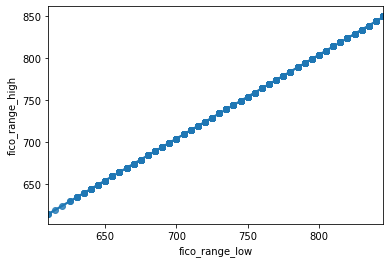

In [15]:
#remove one of the variables
sns.regplot(x='fico_range_low', y='fico_range_high', data=df_nu)

<AxesSubplot:xlabel='open_acc', ylabel='num_sats'>

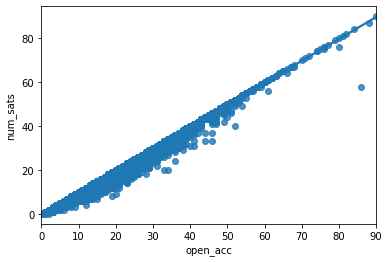

In [16]:
#drop one of the variables
sns.regplot(x='open_acc', y='num_sats', data=df_nu)

<AxesSubplot:xlabel='num_actv_rev_tl', ylabel='num_rev_tl_bal_gt_0'>

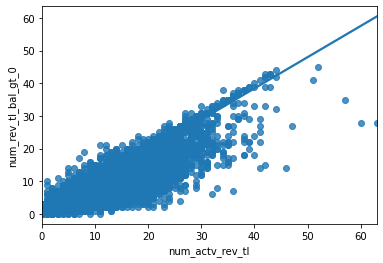

In [17]:
# drop one of the variables
sns.regplot(x='num_actv_rev_tl', y='num_rev_tl_bal_gt_0', data=df_nu)

<AxesSubplot:xlabel='tot_cur_bal', ylabel='tot_hi_cred_lim'>

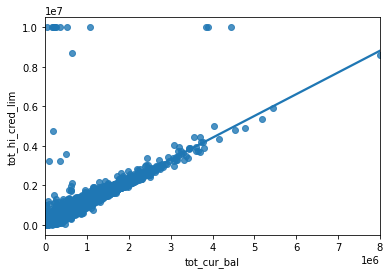

In [18]:
#drop one of the variables
sns.regplot(x='tot_cur_bal', y='tot_hi_cred_lim', data=df_nu)

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

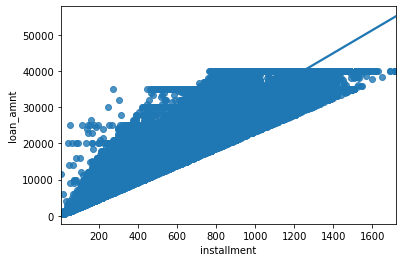

In [19]:
#althought installment is highly correlated with loan_amnt, there is a wide range of loan amount from about 400 to 1000 installment, we keep both so far
sns.regplot(x='installment', y='loan_amnt', data=df_nu)

In [20]:
# the highly correlated pairs will decrease the importantce of each other and we hope to apply less features for creating a model
drop_nu = ['fico_range_high','num_sats', 'num_rev_tl_bal_gt_0', 'tot_hi_cred_lim']
df = df[[c for c in df.columns if c not in drop_nu]]

We will test if Default because it has different loan_amnt from Non-default, Null hypothesis will be there is no difference between the two groups.

In [21]:
Default = df[df['Default'] == 1]
Fu_paid = df[df['Default'] == 0]

In [22]:
Default.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,fico_range_low,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,total_rec_prncp,total_rec_int,application_type,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,Default
10,18000.0,60,19.48,471.70,E,E2,7,RENT,150000.0,2015-12-01,Default,debt_consolidation,CA,9.39,0.0,665.0,1.0,NaN,18.0,14052.0,40.7,27.0,3481.86,4351.98,Individual,36247.0,34500.0,7.0,2014.0,5128.0,51.3,115.0,112.0,1.0,1.0,2.0,9.0,2.0,0.0,6.0,13.0,7.0,8.0,6.0,16.0,19.0,3.0,100.0,14.3,36247.0,10300.0,31319.0,1
21,4225.0,36,14.85,146.16,C,C5,5,RENT,35000.0,2015-12-01,Default,debt_consolidation,KS,15.22,2.0,725.0,0.0,18.0,6.0,1058.0,24.6,6.0,1536.90,653.60,Individual,4888.0,4300.0,0.0,815.0,2233.0,14.1,47.0,53.0,26.0,26.0,0.0,26.0,14.0,0.0,1.0,2.0,3.0,3.0,1.0,5.0,5.0,0.0,66.7,0.0,4888.0,2600.0,17522.0,1
26,16000.0,36,12.88,538.18,C,C2,10,MORTGAGE,65000.0,2015-12-01,Default,small_business,AL,18.96,0.0,675.0,0.0,33.0,7.0,5157.0,54.3,20.0,13833.12,3402.05,Individual,39781.0,9500.0,2.0,5683.0,3684.0,21.6,256.0,360.0,1.0,1.0,0.0,1.0,14.0,1.0,3.0,5.0,3.0,3.0,12.0,5.0,7.0,2.0,80.0,0.0,39781.0,4700.0,71499.0,1
27,24250.0,60,24.24,701.01,F,F3,4,MORTGAGE,75000.0,2015-12-01,Default,debt_consolidation,NY,20.84,0.0,660.0,0.0,NaN,18.0,24799.0,65.3,21.0,1332.69,2791.73,Individual,320098.0,38000.0,13.0,17783.0,9044.0,68.9,93.0,104.0,2.0,2.0,2.0,2.0,7.0,0.0,10.0,12.0,11.0,12.0,2.0,15.0,16.0,3.0,100.0,63.6,38475.0,29100.0,18300.0,1
29,25000.0,60,13.99,581.58,C,C4,9,MORTGAGE,79000.0,2015-12-01,Default,debt_consolidation,MD,34.53,0.0,730.0,1.0,NaN,33.0,22519.0,18.6,72.0,8364.55,6126.37,Individual,265233.0,121200.0,12.0,8556.0,57049.0,21.4,124.0,174.0,1.0,1.0,6.0,2.0,2.0,0.0,6.0,16.0,12.0,21.0,15.0,29.0,51.0,6.0,100.0,0.0,89978.0,72600.0,81802.0,1


In [48]:
df2 = df[[c for c in df.columns if c not in non_nu]]

In [85]:
#get all numeric variables, and calculate their means differences between Default and Non-default
difference = []
for col in df2.columns:
    col_De = Default[col]
    col_Fu = Fu_paid[col]
    difference.append(abs(np.mean(col_De) - np.mean(col_Fu)))
    diff = [col, difference[-1]]
    print(diff)

['loan_amnt', 1526.4300626996792]
['int_rate', 3.0766514795412423]
['installment', 36.269983949523635]
['annual_inc', 6807.73924670041]
['dti', 2.3494350958058234]
['delinq_2yrs', 0.04285254625634061]
['fico_range_low', 10.079858630789658]
['inq_last_6mths', 0.14648733920436086]
['mths_since_last_delinq', 0.6973047042384621]
['open_acc', 0.36332302623016055]
['revol_bal', 1132.3693625716314]
['revol_util', 3.2942802670311977]
['total_acc', 0.45741643678773514]
['total_rec_int', 405.26179897152724]
['tot_cur_bal', 27176.554507757945]
['total_rev_hi_lim', 4649.88978890896]
['acc_open_past_24mths', 0.7758493525851309]
['avg_cur_bal', 3112.2330090676824]
['bc_open_to_buy', 2968.3803784786996]
['bc_util', 4.158566770566928]
['mo_sin_old_il_acct', 3.524026205426452]
['mo_sin_old_rev_tl_op', 12.014521212316822]
['mo_sin_rcnt_rev_tl_op', 2.1004734007614125]
['mo_sin_rcnt_tl', 1.150447976780078]
['mort_acc', 0.386061586639856]
['mths_since_recent_bc', 3.8623744585703896]
['mths_since_recent_inq

In [41]:
#def obs_diff(data, col):
   # difference = []
   # for col in data.columns:
      #  col_De = Default[col]
       # col_Fu = Fu_paid[col]
       # difference.append(np.mean(col_De) - np.mean(col_Fu))
       # return difference[-1]

In [109]:
def obs_diff():
    var_De = Default['int_rate']
    var_Fu = Fu_paid['int_rate']
    difference = np.mean(var_De) - np.mean(var_Fu)
    return abs(difference)

def p_value(data):

    differences = []
    #p_value = []

    # Now make a for loop that does the following 1000 times:
    # 1. makes a permutation of var
    # 2. calculates the difference in the mean var for default and the mean var for non-default
    for i in range(1000):
        permutation = np.random.permutation(data.int_rate)
        difference.append(np.mean(permutation[data['Default']==1]) - np.mean(permutation[data['Default']==0]))
    # Now make a variable called obs_difference, and assign it the result of the mean of our 'apple' variable and the mean of our 'google variable'
        return np.sum(differences[i] >= obs_diff()) / len(differences)

In [107]:
def obs_diff():
    var_De = Default['int_rate']
    var_Fu = Fu_paid['int_rate']
    difference = np.mean(var_De) - np.mean(var_Fu)
    return abs(difference)

In [108]:
obs_diff()

3.0766514795412423

In [112]:
#p_value(df), 

In [ ]:
plt.hist(differences)

(array([160064., 239028., 321890., 253731., 187611., 105963.,  48810.,
         33107.,  10080.,   9282.]),
 array([ 5.31 ,  7.878, 10.446, 13.014, 15.582, 18.15 , 20.718, 23.286,
        25.854, 28.422, 30.99 ]),
 <BarContainer object of 10 artists>)

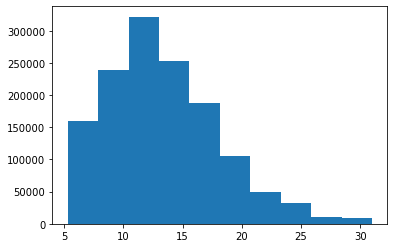

In [111]:
plt.hist(df.int_rate)

In [114]:
int_De = Default['int_rate']
int_Fu = Fu_paid['int_rate']

In [115]:
int_De_normal = stats.normaltest(int_De)
print(int_De_normal)

NormaltestResult(statistic=14632.700477732758, pvalue=0.0)


In [116]:
int_Fu_normal = stats.normaltest(int_Fu)
print(int_Fu_normal)

NormaltestResult(statistic=92089.8037024804, pvalue=0.0)


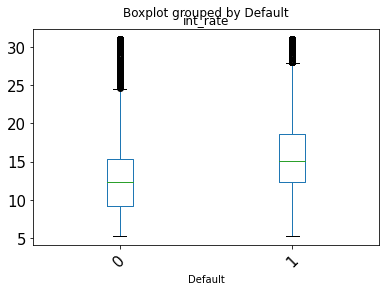

In [117]:
_ = df.boxplot(by = 'Default',column = ['int_rate'], grid=False, rot=45, fontsize=15)

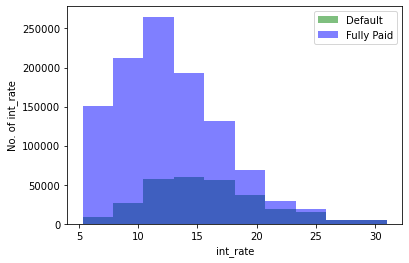

In [119]:
histDe = plt.hist(int_De, color = 'g', alpha =0.5, label = 'Default')
histFu = plt.hist(int_Fu, color = 'b', alpha =0.5, label = 'Fully Paid')
plt.xlabel('int_rate')
plt.ylabel('No. of int_rate')
plt.legend()

In [120]:
#Default has higher mean than non-default
df.groupby('Default')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,1078739.0,12.625786,4.524947,5.31,9.17,12.29,15.31,30.99
1,290827.0,15.702438,4.937614,5.31,12.29,15.04,18.55,30.99


In [122]:
# Create a column called `Permutation1`, and assign to it the result of permuting (shuffling) the int_rate column
# This assignment will use our numpy object's random.permutation() method
df['Permutation1'] = np.random.permutation(df.int_rate)

# Call the describe() method on our permutation grouped by 'default'. 
df.groupby('Default')['Permutation1'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,1078739.0,13.276058,4.784651,5.31,9.75,12.74,16.02,30.99
1,290827.0,13.290439,4.782017,5.31,9.75,12.79,16.02,30.99


In [123]:
difference = []

# Now make a for loop that does the following 10,000 times:
# 1. makes a permutation of the 'Rating' as you did above
# 2. calculates the difference in the mean rating for apple and the mean rating for google. 
for i in range(1000):
    permutation = np.random.permutation(df['int_rate'])
    difference.append(np.mean(permutation[df['Default']==1]) - np.mean(permutation[df['Default']==0]))

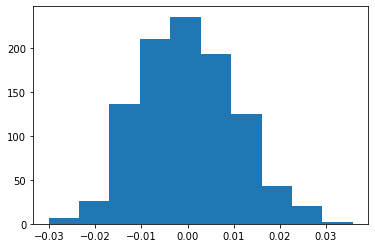

In [124]:
histo = plt.hist(difference)

In [125]:
p_value = np.sum(difference[i] >= obs_diff()) / len(difference)
print(p_value)

0.0


below is loan_amnt, the plan is to write a function to get a p value list

In [127]:
#
loan_amnt_De = df[df['Default'] == 1]['loan_amnt']
loan_amnt_Fu = df[df['Default'] == 0]['loan_amnt']

In [128]:
loan_amnt_De_normal = stats.normaltest(loan_amnt_De)
print(loan_amnt_De_normal)

NormaltestResult(statistic=19095.66156567945, pvalue=0.0)


In [129]:
loan_amnt_Fu_normal = stats.normaltest(loan_amnt_Fu)
print(loan_amnt_Fu_normal)

NormaltestResult(statistic=93747.77382234795, pvalue=0.0)


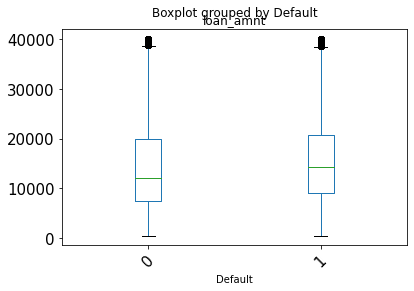

In [130]:
_ = df.boxplot(by = 'Default',column = ['loan_amnt'], grid=False, rot=45, fontsize=15)

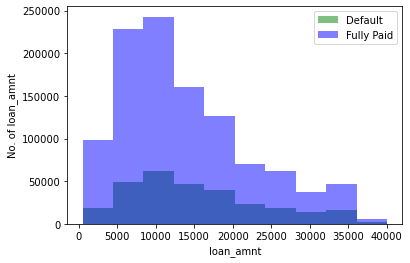

In [131]:
histDe = plt.hist(loan_amnt_De, color = 'g', alpha =0.5, label = 'Default')
histFu = plt.hist(loan_amnt_Fu, color = 'b', alpha =0.5, label = 'Fully Paid')
plt.xlabel('loan_amnt')
plt.ylabel('No. of loan_amnt')
plt.legend()

In [132]:
#Default has higher mean than non-default
df.groupby('Default')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,1078739.0,14124.637238,8668.035712,500.0,7500.0,12000.0,20000.0,40000.0
1,290827.0,15651.067301,8887.866433,500.0,9000.0,14400.0,20800.0,40000.0


In [133]:
# Create a column called `Permutation1`, and assign to it the result of permuting (shuffling) the Rating column
# This assignment will use our numpy object's random.permutation() method
df['Permutation1'] = np.random.permutation(df.loan_amnt)

# Call the describe() method on our permutation grouped by 'platform'. 
df.groupby('Default')['Permutation1'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,1078739.0,14456.175845,8742.482692,500.0,8000.0,12000.0,20000.0,40000.0
1,290827.0,14421.320321,8718.984409,500.0,8000.0,12000.0,20000.0,40000.0


In [134]:
difference = []

# Now make a for loop that does the following 10,000 times:
# 1. makes a permutation of the 'Rating' as you did above
# 2. calculates the difference in the mean rating for apple and the mean rating for google. 
for i in range(1000):
    permutation = np.random.permutation(df['loan_amnt'])
    difference.append(np.mean(permutation[df['Default']==1]) - np.mean(permutation[df['Default']==0]))

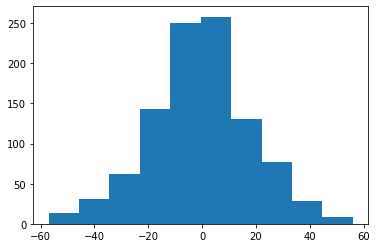

In [135]:
histo = plt.hist(difference)

In [136]:
stats.normaltest(difference)

NormaltestResult(statistic=4.675197115553496, pvalue=0.09655924146779923)

In [137]:
# Now make a variable called obs_difference, and assign it the result of the mean of our 'apple' variable and the mean of our 'google variable'
obs_difference = np.mean(loan_amnt_Fu) - np.mean(loan_amnt_De)

# Make this difference absolute with the built-in abs() function. 
obs_difference = abs(obs_difference)

# Print out this value;  
print(obs_difference)

1526.4300626996792


In [138]:
p_value = np.sum(difference[i] >= obs_difference) / len(difference)
print(p_value)

0.0


In [141]:
def p_value(df):
    #df['Permutation1'] = np.random.permutation(df.loan_amnt)

    difference = []
    #p_value = []

    # Now make a for loop that does the following 10,000 times:
    # 1. makes a permutation of the 'Rating' as you did above
    # 2. calculates the difference in the mean rating for apple and the mean rating for google. 
    for i in range(1000):
        permutation = np.random.permutation(df.int_rate)
        difference.append(np.mean(permutation[df['Default']==1]) - np.mean(permutation[df['Default']==0]))
    # Now make a variable called obs_difference, and assign it the result of the mean of our 'apple' variable and the mean of our 'google variable'

    return np.sum(difference[i] >= 3.0766514795412423) / len(difference)


In [142]:
p_value(df)

0.0